In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("/Users/nikitacarolyn/Downloads/airbnb.csv")

In [385]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [386]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [388]:
df.shape

(41714, 19)

In [273]:
df.columns=(
     df.columns.str.lower()
    .str.replace(' ', '_')
    .str.replace('restraunt','restaurant')
)
df.head()

,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_(km),metro_distance_(km),attraction_index,normalised_attraction_index,restaurant_index,normalised_restaurant_index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [274]:
bool_cols = ['shared_room', 'private_room', 'superhost']
for col in bool_cols:
    df[col] = df[col].astype(int)

In [275]:
df.nunique()

city                               9
price                           8087
day                                2
room_type                          3
shared_room                        2
private_room                       2
person_capacity                    5
superhost                          2
multiple_rooms                     2
business                           2
cleanliness_rating                 9
guest_satisfaction                51
bedrooms                           9
city_center_(km)               41714
metro_distance_(km)            41714
attraction_index               41714
normalised_attraction_index    41697
restaurant_index               41714
normalised_restaurant_index    41697
dtype: int64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         41714 non-null  object 
 1   price                        41714 non-null  float64
 2   day                          41714 non-null  object 
 3   room_type                    41714 non-null  object 
 4   shared_room                  41714 non-null  int64  
 5   private_room                 41714 non-null  int64  
 6   person_capacity              41714 non-null  float64
 7   superhost                    41714 non-null  int64  
 8   multiple_rooms               41714 non-null  int64  
 9   business                     41714 non-null  int64  
 10  cleanliness_rating           41714 non-null  float64
 11  guest_satisfaction           41714 non-null  float64
 12  bedrooms                     41714 non-null  int64  
 13  city_center_(km)

In [277]:
df.isnull().sum()

city                           0
price                          0
day                            0
room_type                      0
shared_room                    0
private_room                   0
person_capacity                0
superhost                      0
multiple_rooms                 0
business                       0
cleanliness_rating             0
guest_satisfaction             0
bedrooms                       0
city_center_(km)               0
metro_distance_(km)            0
attraction_index               0
normalised_attraction_index    0
restaurant_index               0
normalised_restaurant_index    0
dtype: int64

In [278]:
df.duplicated().sum()

0

In [279]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
shared_room,41714.0,0.007575,0.086707,0.000000,0.000000,0.000000,0.000000,1.000000
private_room,41714.0,0.314858,0.464465,0.000000,0.000000,0.000000,1.000000,1.000000
person_capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
superhost,41714.0,0.279498,0.448758,0.000000,0.000000,0.000000,1.000000,1.000000
multiple_rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
cleanliness_rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000


## Graph showing Price wrt City

Text(0, 0.5, 'Count of city')

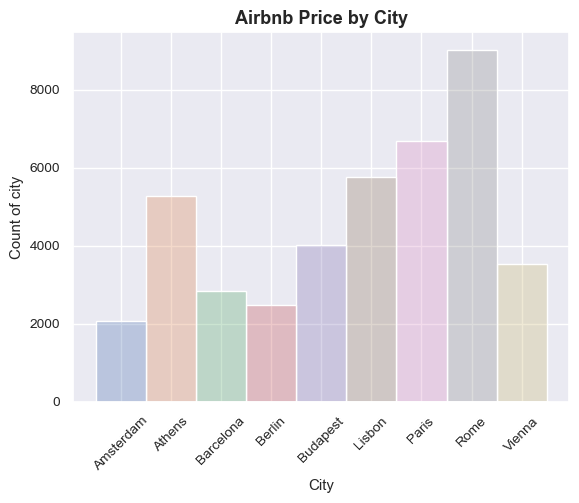

In [280]:
sns.histplot(data = df, x = 'city', bins = 20, alpha=0.3, hue='city', legend = False)
plt.title('Airbnb Price by City', fontsize=13, weight='bold')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count of city')

# DATA TRANSFORMATIONS:

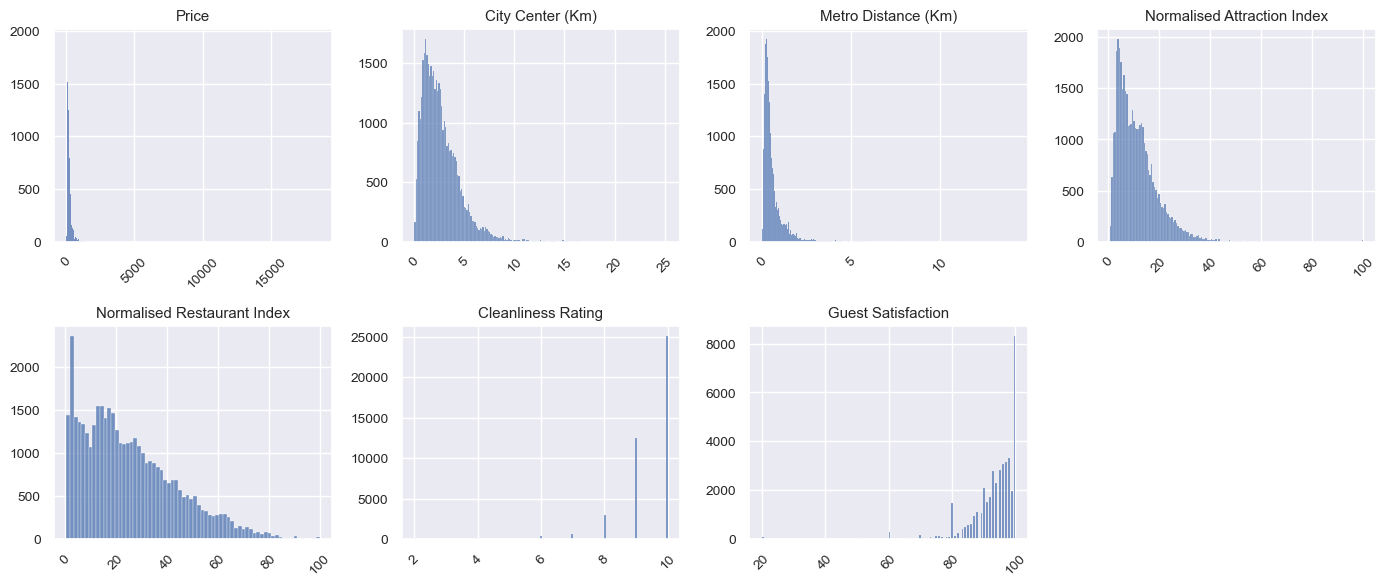

In [281]:
numeric_cols = ['price', 'city_center_(km)', 'metro_distance_(km)', 'normalised_attraction_index', 
                'normalised_restaurant_index', 'cleanliness_rating', 'guest_satisfaction']

plt.figure(figsize=(14,6))

for i, column in enumerate(numeric_cols):
    plt.subplot(2,4,i+1)
    sns.histplot(data=df, x=column)
    col_title = column.replace('_', ' ').title()
    plt.title(col_title)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

From the histograms, there is primarily right-skewed distributions, however, left-skewed distribution for cleanliness and guest satisfaction. 
Now, we have to scale these values using the min-max scale to maintain uniformity in the range of values. This also means normalized_attraction_index and normalized_restaurant_index are likely better predictors since they are closest to a normal distribution. 

## Outliers for price:

<Axes: >

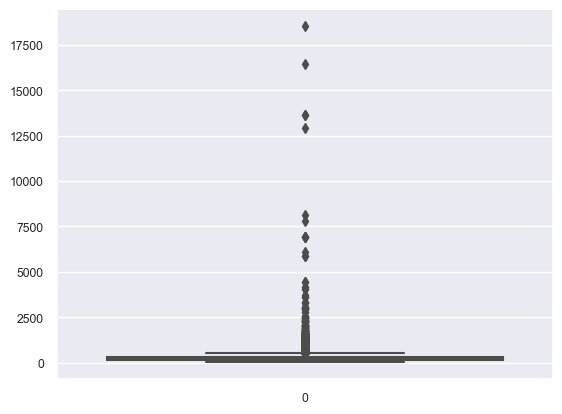

In [382]:
sns.boxplot(df['price'])

In [283]:
cap_5000 = df[df['price'] <= 5000]
cap_2500 = df[df['price'] <= 2500]
cap_1000 = df[df['price'] <= 1000]

rows_cut = [len(df) - len(airbnb) for airbnb in [cap_5000, cap_2500, cap_1000]]

In [284]:
rows_cut

[14, 41, 476]

2500$ cap makes the most sense for generalisation since most of the highly expensive listings are gone, but 
less than 50 listings are removed. 
476 is still quite small at roughly 1% of the overall data, however it is better not to eliminate too many data 
points unless really required

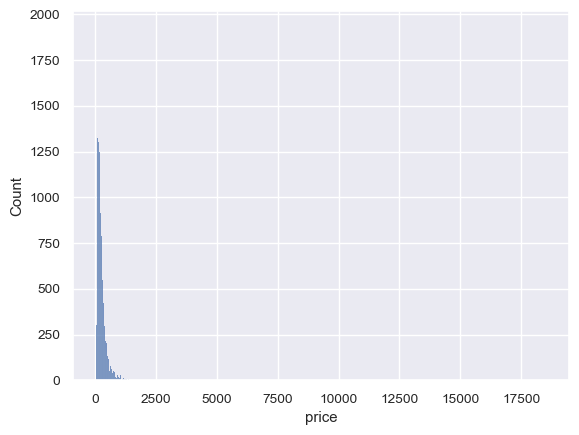

In [285]:
sns.histplot(df['price']);

Now, the price column has a similar shape as some of the other features

In [286]:
for col in numeric_cols:
    df['log_'+col] = df[col].apply(lambda x: np.log(x+1))
log_df = df[[col for col in df.columns if col.startswith('log_')]]
log_df.head()

,log_price,log_city_center_(km),log_metro_distance_(km),log_normalised_attraction_index,log_normalised_restaurant_index,log_cleanliness_rating,log_guest_satisfaction
0,5.273172,1.795579,1.263952,1.642236,2.060064,2.397895,4.543295
1,5.844257,0.397695,0.214631,3.538673,4.083333,2.197225,4.454347
2,5.580112,1.909292,1.537216,1.606615,2.034274,2.302585,4.477337
3,6.074264,0.325601,0.364557,3.300239,4.126708,2.302585,4.510860
4,6.187346,0.434854,0.276641,3.410247,4.057191,2.397895,4.595120


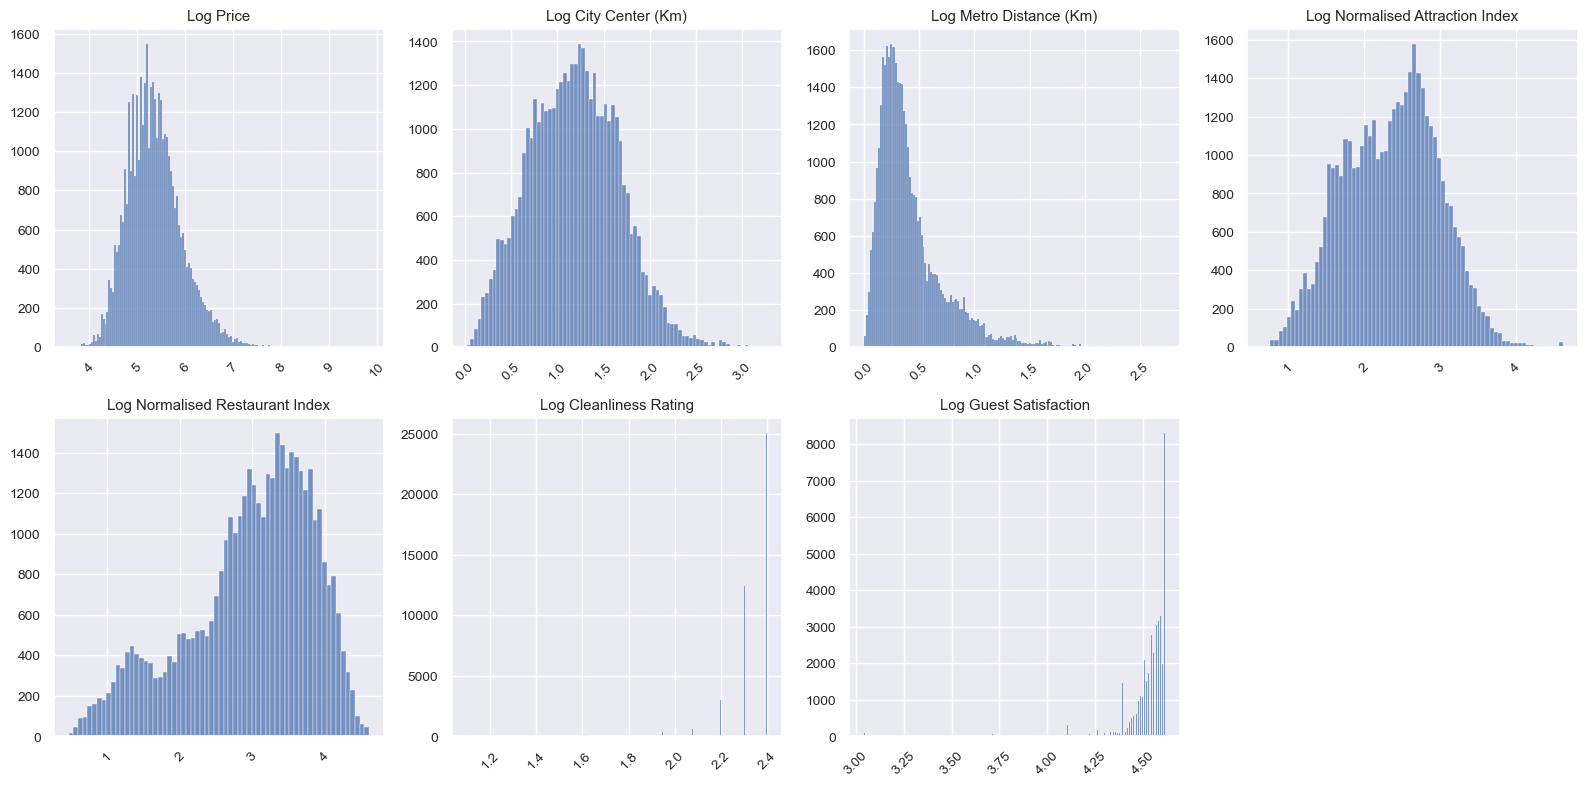

In [287]:
plt.figure(figsize=(16,8))

for i, column in enumerate(log_df.columns):
    plt.subplot(2,4,i+1)
    sns.histplot(data=log_df, x=column)
    col_title = column.replace('_', ' ').title()
    plt.title(col_title)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Most of these distributions look more normally distributed and help meet assumptions of Pearson Correlation Coefficient.
The log transform work better than the provided normalised form of Restrant and Attraction Index.
However, cleanliness and satisfaction distributions are closer to discrete values than they are continuous

# To mainly check the distribution of the target variable - Price

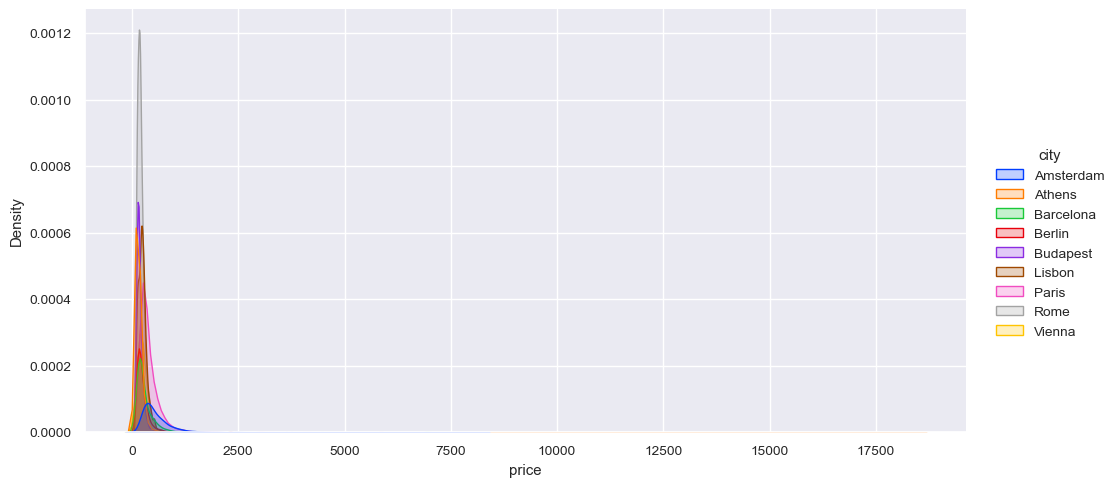

In [288]:
sns.displot(data=df, x='price', hue='city', kind='kde', fill=True, palette=sns.color_palette('bright')[:9], height=5, aspect=2)

From the graph, the price is not normally distributed. Some accomodations have a rather high price, hence we cannot talk about normal distribution at all. Therefore, we have to scale this value

Since Price is our target variable, mainly focusing on Price, we see that it not normally distributed and its descriptive statistics are comparitively higher than the other variables and hence, we scale it.

In [289]:
df.log_price.describe()

count    41714.000000
mean         5.372326
std          0.568789
min          3.577371
25%          4.976845
50%          5.322128
75%          5.698346
max          9.828034
Name: log_price, dtype: float64

After applying log10 to normalise the Price variable. Now we can prepare 3 plots using this to check how the price depends on city, day of the week and person capacity

## Distribution of Price wrt City, Day and Person Capacity

/var/folders/l1/5ptdcyqx41q753f04b_91cq40000gn/T/ipykernel_43505/1782930401.py:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.displot(data=df, x='log_price', hue='day', kind='kde', fill=True, palette=sns.color_palette('bright')[:9],
/var/folders/l1/5ptdcyqx41q753f04b_91cq40000gn/T/ipykernel_43505/1782930401.py:7: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.displot(data=df, x='log_price', hue='person_capacity', kind='kde', fill=True, palette=sns.color_palette('bright')[:9],


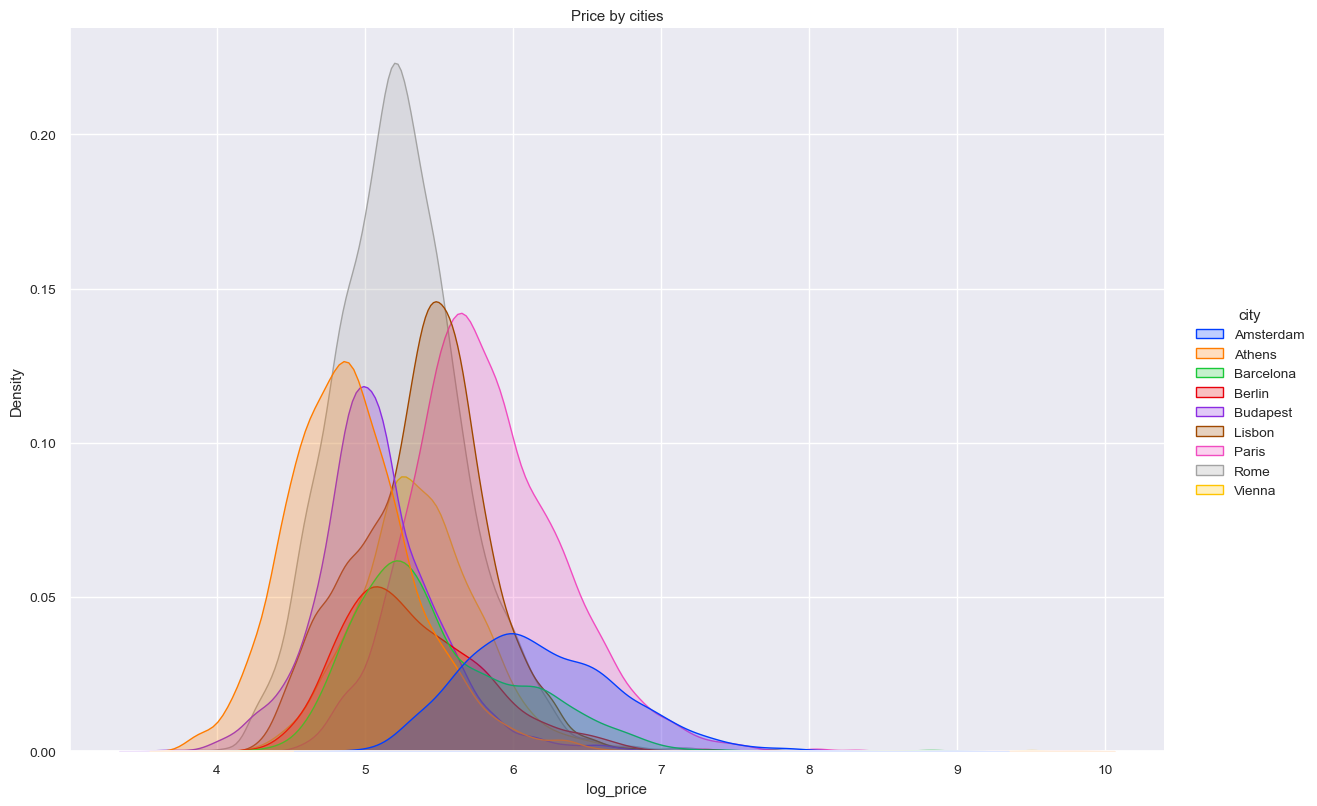

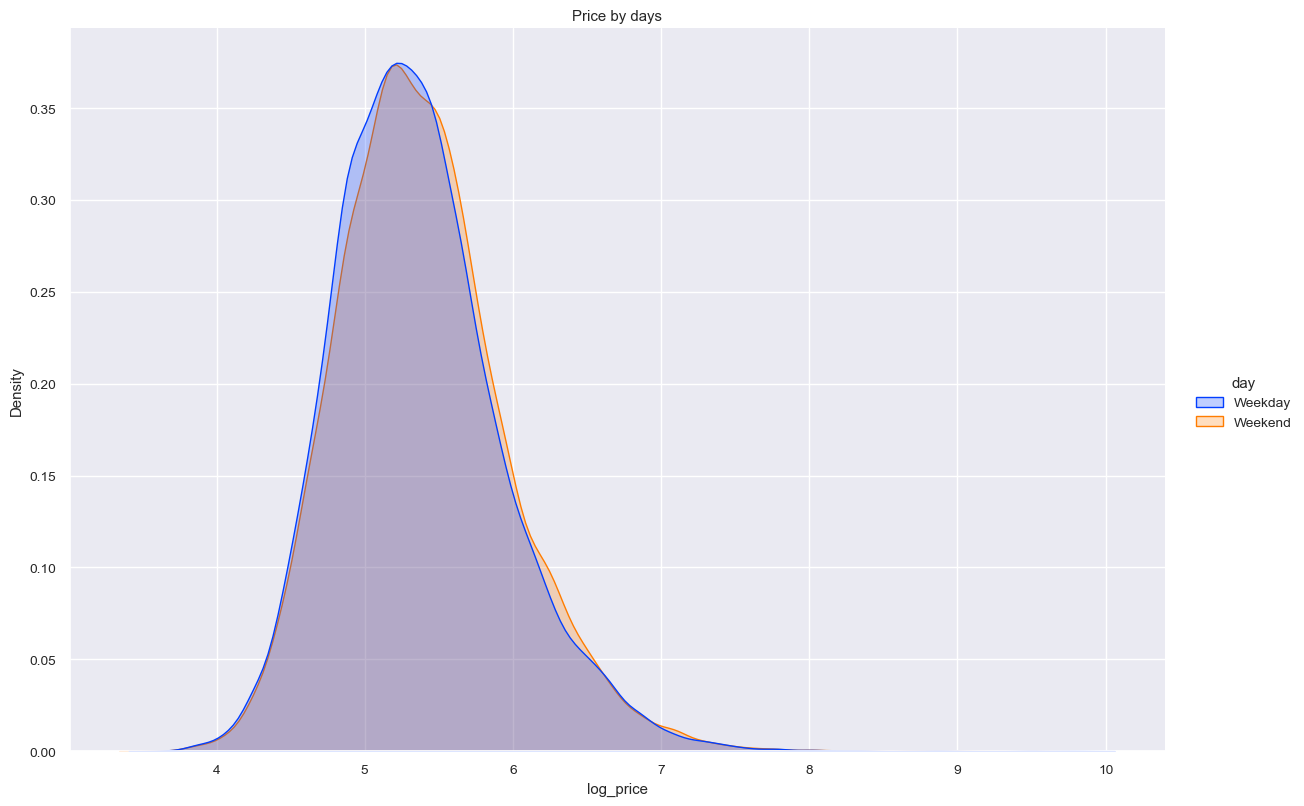

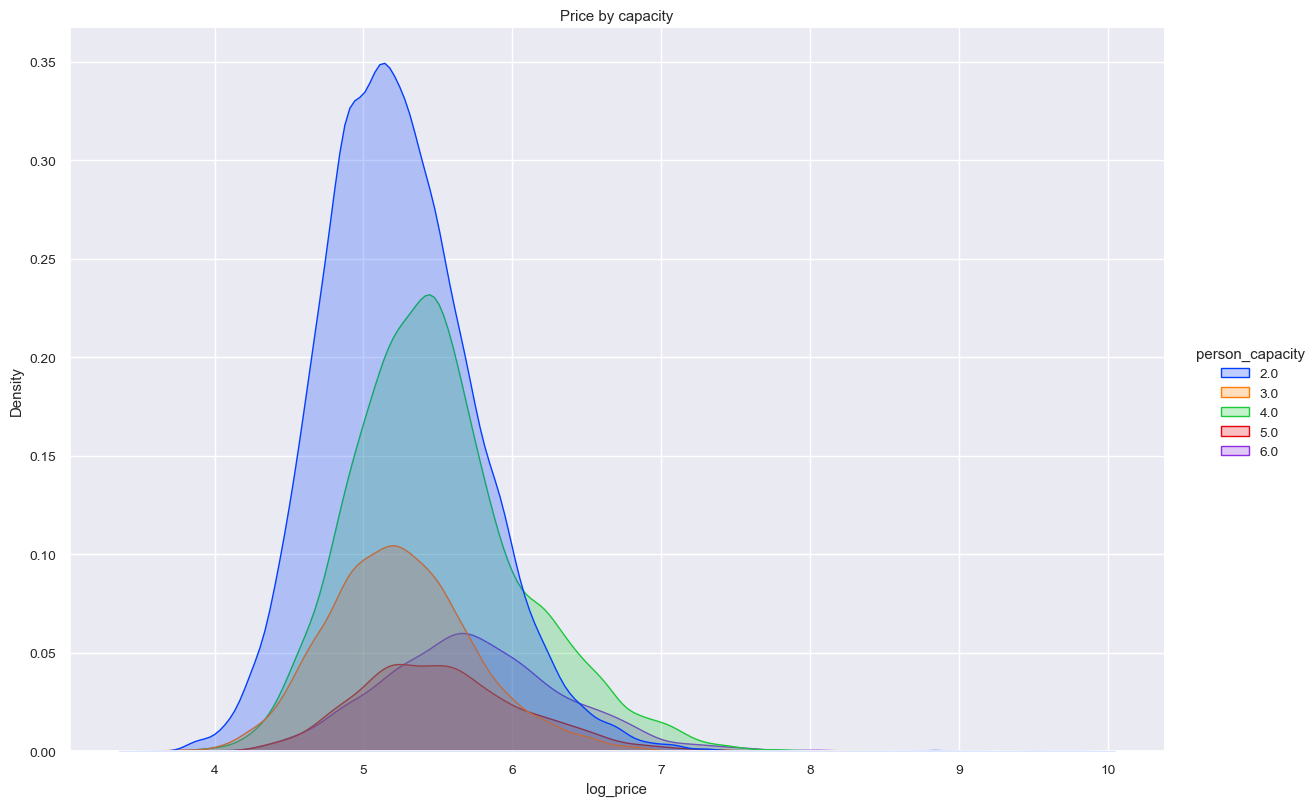

In [290]:
sns.displot(data=df, x='log_price', hue='city', kind='kde', fill=True, palette=sns.color_palette('bright')[:9], 
            height=8, aspect=1.5).set(title='Price by cities')

sns.displot(data=df, x='log_price', hue='day', kind='kde', fill=True, palette=sns.color_palette('bright')[:9], 
            height=8, aspect=1.5).set(title='Price by days')

sns.displot(data=df, x='log_price', hue='person_capacity', kind='kde', fill=True, palette=sns.color_palette('bright')[:9], 
            height=8, aspect=1.5).set(title='Price by capacity')

Conclusions from the graphs:

Price vs City - The most of the data points for accomodation is represented by Rome. Airbnb accommodation is chaper in Athenes, while Amsterdam and Paris are more expensive than the other Cities

Price wrt Days - From the graph, we see that the price of Airbnbs does not depend on the day of the week. On both, week days and weekends, the prices are mostly similar with no difference in which day is better to rent

Price vs Person capacity - We can conclude at least 2 things:
-In the dataset, the most common person capacity offered by Airbnbs is 2
-Prices for all the different person capacities are almost similar to each other. The only visible difference is that of person capacity 4 which is second most common and also little more expensive than the others, however it is not that significant.

 Visitors leave the best satisfaction rating if the house was cleaned perfectly.

We see that satisfaction of guests does not depend on the distance to the city centre. This means that the guests book accomodations mosrtly irrespective of this variable even if the accommodation is far away from the city centre but keeping the other variables (like cleanliness, price, room type etc) as priority.

## Dependence of Guest Satisfaction on Price

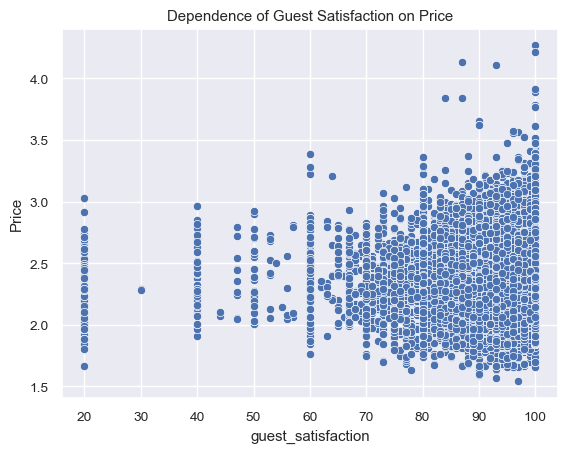

In [292]:
sns.scatterplot(x='guest_satisfaction', y=df_log['Price'], data=df, legend='full').set(title='Dependence of Guest Satisfaction on Price');

The guest satisfaction is comparitively high (from 70 to 100) when the price is moderate, that is neither too high, nor too low (2, 2.5 and 3. It may even go up to 3.5 but comaritively less). This could mean that customers are willing to pay a moderate price for a good enough accommodation. Cheaper accommodations might not have all the required facilities that a customer needs and an expensive accommodation may be way over budget for the customer.

[Text(0.5, 1.0, 'Boxplot of Guest satisfaction and Price')]

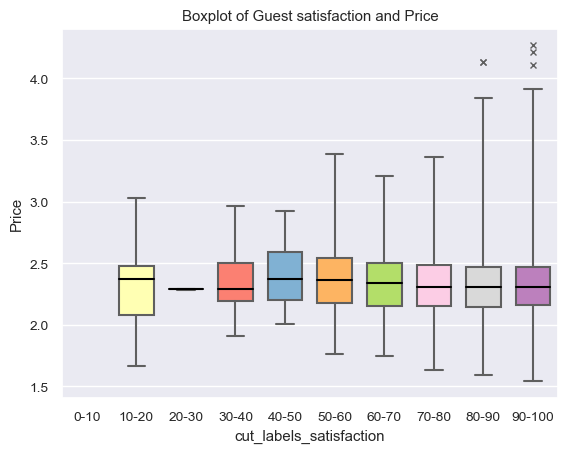

In [293]:
sns.boxplot(data=df_log, x='cut_labels_satisfaction', y=df_log['Price'], palette='Set3', saturation=1, width=0.7, whis=5,
            medianprops={"color": "black"}, flierprops={"marker": "x"}).set(title='Boxplot of Guest satisfaction and Price')

Here, we see that the guest satisfaction does not depend on the price of the rooms. 

## Distance from City Centre and Price

[Text(0.5, 1.0, 'Distance from City Centre and Price')]

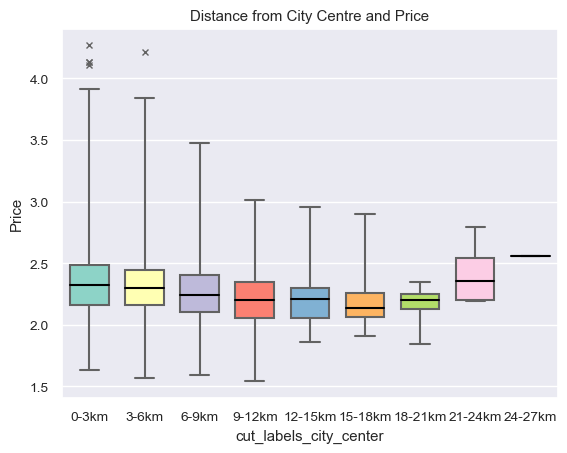

In [294]:
sns.boxplot(data=df_log, x='cut_labels_city_center', y=df_log['Price'], palette='Set3', saturation=1, width=0.7, whis=5,
            medianprops={"color": "black"}, flierprops={"marker": "x"}).set(title='Distance from City Centre and Price')

The price is quite low wrt the distance and remains more or less constant from 0km to 12km

Text(0, 0.5, 'Count')

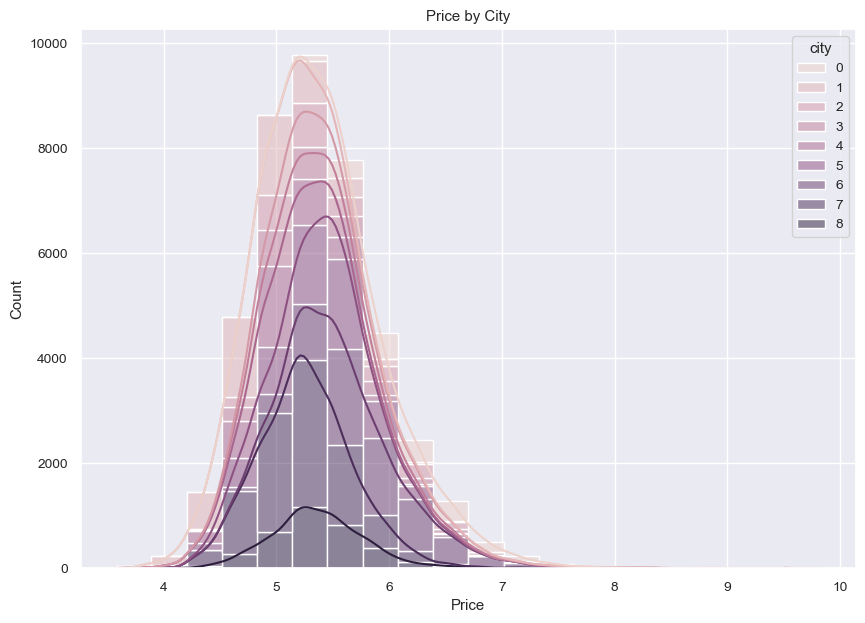

In [342]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = 'log_price', hue = 'city', bins = 20, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0.5, 0, 'Cleanliness Rating')

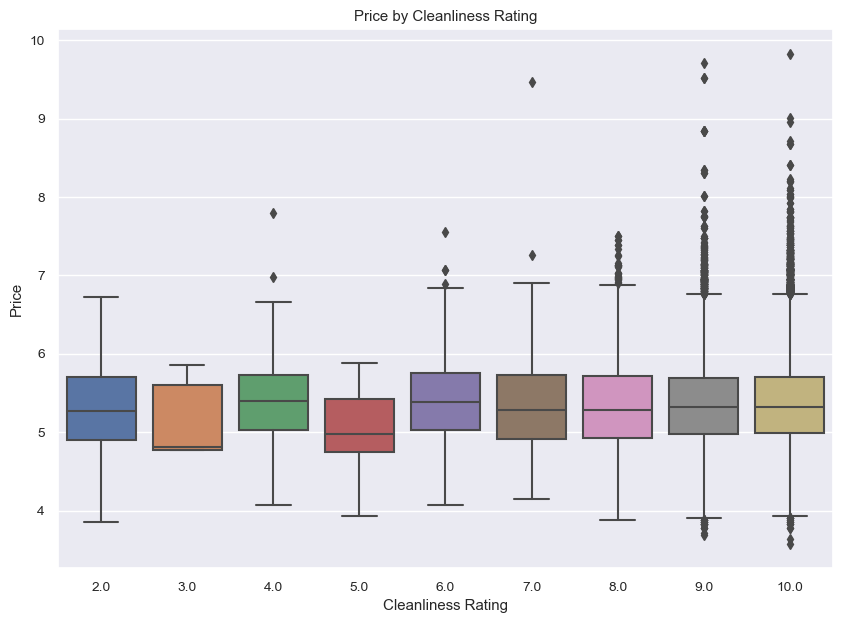

In [343]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'cleanliness_rating', y = 'log_price', data=df)

plt.title('Price by Cleanliness Rating')
plt.ylabel('Price')
plt.xlabel('Cleanliness Rating')

Text(0.5, 0, 'Bedrooms')

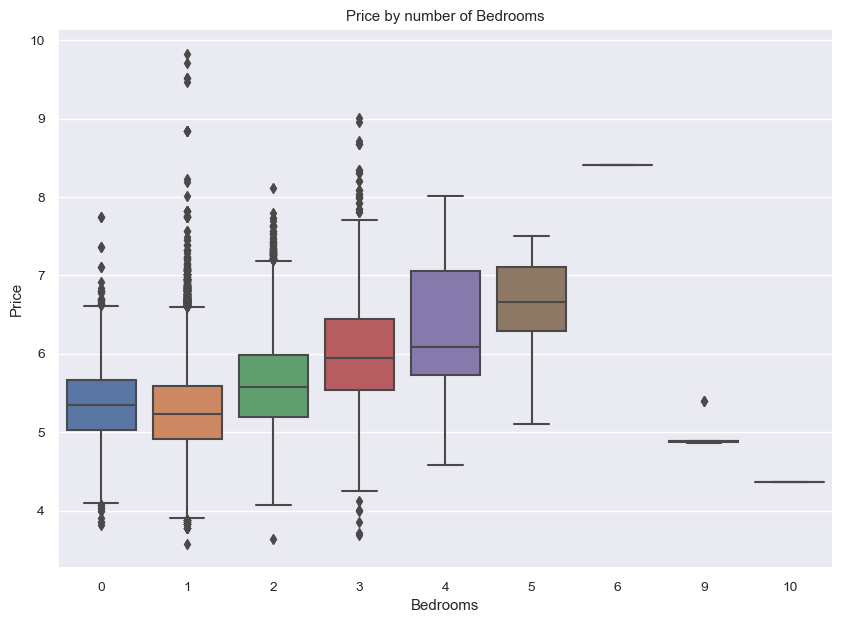

In [344]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'bedrooms', y = 'log_price', data=df)

plt.title('Price by number of Bedrooms')
plt.ylabel('Price')
plt.xlabel('Bedrooms')

/var/folders/l1/5ptdcyqx41q753f04b_91cq40000gn/T/ipykernel_43505/2063461087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat = df.corr(method='pearson')


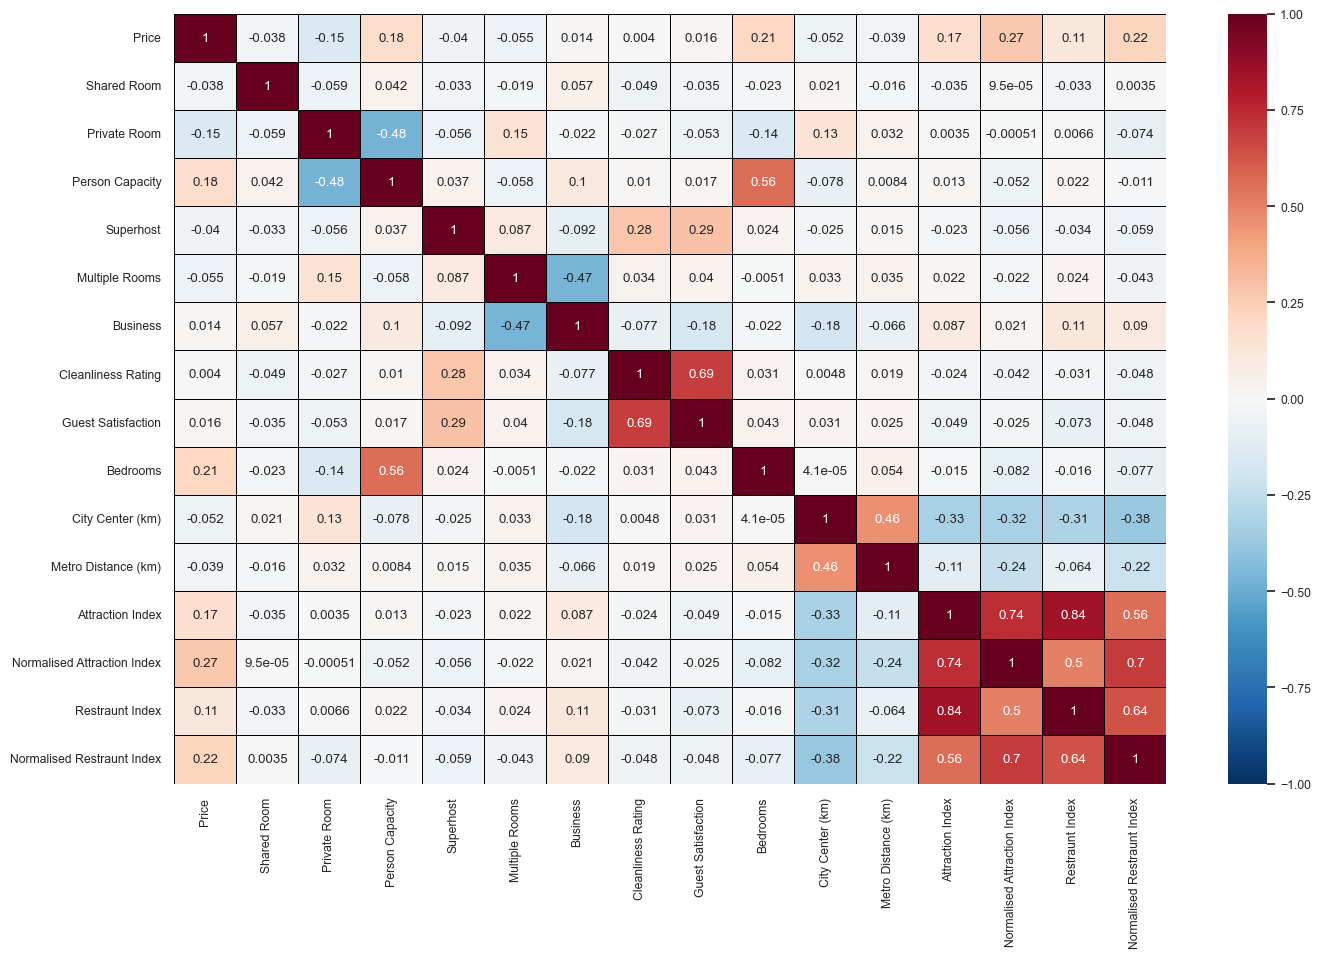

In [403]:
corrMat = df.corr(method='pearson')
sns.set(font_scale=0.8)
plt.figure(figsize=(16,10))
sns.heatmap(corrMat, cmap='RdBu_r',annot=True, vmin=-1, vmax=1,linewidths=0.5, linecolor='black',square=False,); 

## Machine Learning (Target - Price):

In [364]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X = df.drop(['price','shared_room','private_room',
             'superhost','attraction_index','restaurant_index', 'day',
             'cleanliness_rating'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [366]:
X=pd.get_dummies(X)
X.head()

,city,room_type,person_capacity,multiple_rooms,business,guest_satisfaction,bedrooms,city_center_(km),metro_distance_(km),normalised_attraction_index,normalised_restaurant_index,log_price,log_city_center_(km),log_metro_distance_(km),log_normalised_attraction_index,log_normalised_restaurant_index,log_cleanliness_rating,log_guest_satisfaction
0,0,1,2.0,1,0,93.0,1,5.022964,2.539380,4.166708,6.846473,5.273172,1.795579,1.263952,1.642236,2.060064,2.397895,4.543295
1,0,1,4.0,0,0,85.0,1,0.488389,0.239404,33.421209,58.342928,5.844257,0.397695,0.214631,3.538673,4.083333,2.197225,4.454347
2,0,1,2.0,0,1,87.0,1,5.748312,3.651621,3.985908,6.646700,5.580112,1.909292,1.537216,1.606615,2.034274,2.302585,4.477337
3,0,1,4.0,0,1,90.0,2,0.384862,0.439876,26.119108,60.973565,6.074264,0.325601,0.364557,3.300239,4.126708,2.302585,4.510860
4,0,1,2.0,0,0,98.0,1,0.544738,0.318693,29.272733,56.811677,6.187346,0.434854,0.276641,3.410247,4.057191,2.397895,4.595120


In [367]:
RF = RandomForestRegressor(n_estimators=1000)
RF.fit(X_train,y_train)

predict_RF = RF.predict(X_test)

In [359]:
print('R2 Score: ', r2_score(y_test, predict_RF))
print("MSE: ", mean_squared_error(y_test, predict_RF))
print("MAE: ", mean_absolute_error(y_test, predict_RF))

results_df = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, predict_RF)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

R2 Score:  0.9877348128331658
MSE:  1175.1034171499139
MAE:  0.7145715908152709


In [368]:
from sklearn.linear_model import LinearRegression

In [369]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LR_pred = LR.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, LR_pred)


results_df_temp = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, LR_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 62.155060735941746
MSE: 51832.11250714142
RMSE: 227.666669732619
R2 Square 0.4590003297799997
__________________________________


NameError: name 'results_df' is not defined

In [1]:
importances = df.feature_importances_


NameError: name 'df' is not defined

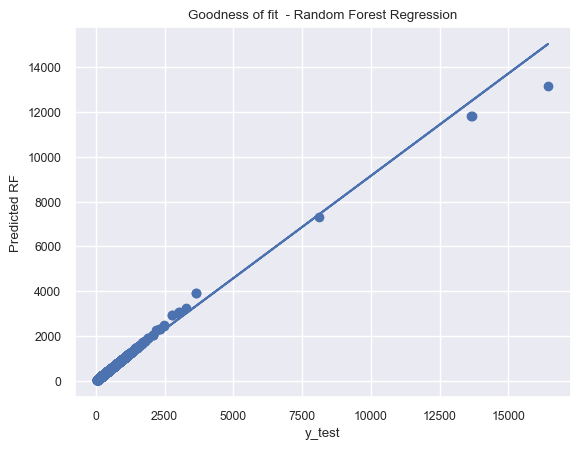

In [401]:
import matplotlib.pyplot as plt
a, b = np.polyfit(y_test, predict_RF, 1)
plt.scatter(y_test, predict_RF)
plt.plot(y_test, a*y_test+b)   

plt.title("Goodness of fit  - Random Forest Regression")
plt.xlabel("y_test")
plt.ylabel("Predicted RF")
plt.grid(True)

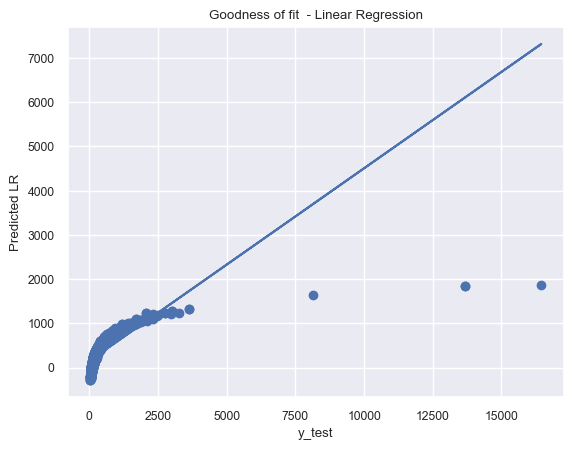

In [402]:
import matplotlib.pyplot as plt
a, b = np.polyfit(y_test, LR_pred, 1)
plt.scatter(y_test, LR_pred)
plt.plot(y_test, a*y_test+b)

plt.title("Goodness of fit  - Linear Regression")
plt.xlabel("y_test")
plt.ylabel("Predicted LR")
plt.grid(True)

In [ ]:
plt.figure(figsize = (10,10))
fti.plot.barh();